In [8]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_test = pd.read_csv('C:\\Users\\NIKHILAA\\Documents\\titanic.csv')
titanic_test.head()
titanic_test.shape
titanic_test.info()
titanic_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Data preprocessing and cleaning
titanic_test = titanic_test.drop(columns = 'Cabin', axis = 1)
titanic_test ['Age'].fillna(titanic_test['Age'].mean(), inplace = True)
titanic_test.isnull().sum()
titanic_test ['Fare'].fillna(titanic_test['Fare'].mean(), inplace = True)
titanic_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

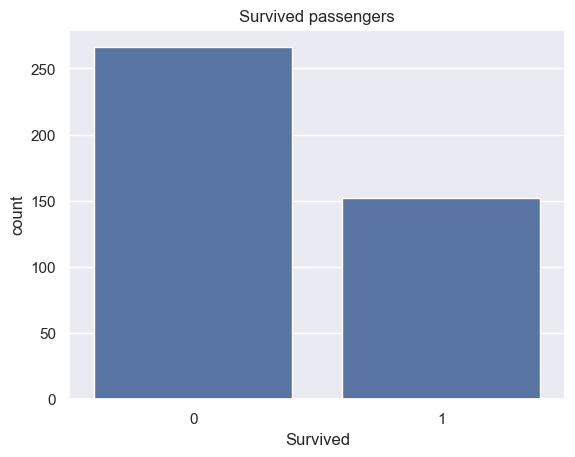

In [10]:
titanic_test['Survived'].value_counts()
sns.set()
sns.countplot(x = 'Survived', data = titanic_test).set_title('Survived passengers')
plt.show()

In [11]:
titanic_test.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

In [12]:
X = titanic_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = titanic_test['Survived']

#Splitting train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [13]:
#Training model using Logistic Regression
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)

#Evaluation and Prediction
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data = ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
print(X_test_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data = ', test_data_accuracy)
print(Y_test)
X_test_prediction = model.predict(X_test)

Accuracy score of training data =  1.0
[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]
Accuracy score of test data =  1.0
146    0
223    0
193    0
305    1
188    1
      ..
348    0
30     0
174    0
68     0
204    0
Name: Survived, Length: 84, dtype: int64


In [14]:
# Predictions using a threshold of 0.5
predictions_binary = (X_test_prediction >= 0.5).astype(int)

# Calculating the survival rate based on the binary predictions
survival_rate_binary = predictions_binary.mean()
print(f"Survival rate based on binary predictions: {survival_rate_binary}")
print("Binary Predictions:")
print(predictions_binary)

Survival rate based on binary predictions: 0.39285714285714285
Binary Predictions:
[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]
